Generate a png file with the QuTiP contributors superposed to QuTiP logo.

<class 'str'>


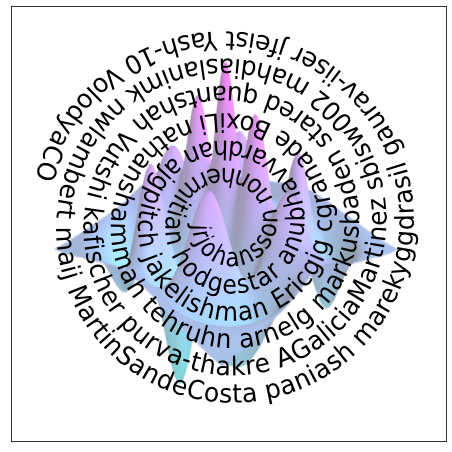

In [34]:
%matplotlib inline

import json
import urllib.request

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.textpath import TextPath
from matplotlib.collections import PolyCollection
from matplotlib.font_manager import FontProperties
import matplotlib.image as mpimg


LINK_CONTRIBUTORS = "https://api.github.com/repos/qutip/qutip/contributors"
LINK_LOGO = "https://qutip.org/images/logo.png"

# font properties
FONT_SIZE = 6
FONT_FAMILY = "Source Serif Pro"

# figures properties
FIGURE_SIZE = 8
AXIS_SIZE = 50
FONT_COLOR = "black"
LOGO_SIZE = 40
LOGO_TRANSPARENCY = 0.5

# load the list of contributors from qutip/qutip repo
url_object = urllib.request.urlopen(LINK_CONTRIBUTORS)
list_contributors = json.loads(url_object.read())

# loading contributors' names
qutip_contributors = [element["login"] for element in list_contributors]
text = " ".join(qutip_contributors)

# code below was inspired in the following link:
# https://github.com/dynamicwebpaige/nanowrimo-2021/blob/main/15_VS_Code_contributors.ipynb

n = 100
A = np.linspace(np.pi, n * 2 * np.pi, 10_000)
R = 5 + np.linspace(np.pi, n * 2 * np.pi, 10_000)
T = np.stack([R * np.cos(A), R * np.sin(A)], axis=1)
dx = np.cos(A) - R * np.sin(A)
dy = np.sin(A) + R * np.cos(A)
O = np.stack([-dy, dx], axis=1)
O = O / (np.linalg.norm(O, axis=1)).reshape(len(O), 1)

L = np.zeros(len(T))
np.cumsum(np.sqrt(((T[1:] - T[:-1]) ** 2).sum(axis=1)), out=L[1:])

path = TextPath((0, 0), text, size=FONT_SIZE, prop=FontProperties(family=FONT_FAMILY))
Vx, Vy = path.vertices[:, 0], path.vertices[:, 1]
X = np.interp(Vx, L, T[:, 0]) + Vy * np.interp(Vx, L, O[:, 0])
Y = np.interp(Vx, L, T[:, 1]) + Vy * np.interp(Vx, L, O[:, 1])
Vx[...], Vy[...] = X, Y

# creating figure
fig, ax = plt.subplots(figsize=(FIGURE_SIZE, FIGURE_SIZE))
patch = PathPatch(path, facecolor=FONT_COLOR, linewidth=0)
ax.add_artist(patch)
ax.set_xlim(-AXIS_SIZE, AXIS_SIZE), ax.set_xticks([])
ax.set_ylim(-AXIS_SIZE, AXIS_SIZE), ax.set_yticks([])

# uncomment lines below to add qutip logo
img = mpimg.imread(LINK_LOGO)
ax.imshow(img, alpha=LOGO_TRANSPARENCY,
          extent=[-LOGO_SIZE,LOGO_SIZE, -LOGO_SIZE, LOGO_SIZE]);

# fig.savefig('./qutip_contributors.png', dpi=300)

<font size=6> END OF NOTEBOOK </font>